In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"

data_train = pd.read_csv(train_file, engine='python')
data_test = pd.read_csv(test_file, engine='python')

# Data
 주어진 데이터를 확인했을 때 기본적으로 categorical data가 많이 존재한다. 따라서 주어진 데이터만으로는 정밀한 예측이 어렵기 때문에 categorical한 변수를 dummy로 바꾸어 correlation matrix를 생성해보려 한다. 일단 데이터가 없는 부분부터 확인하여 데이터를 삽입해주겠다.
 

In [3]:
print('data_train')
display(data_train.head())

display(data_train.keys())
display(data_train.shape)

data_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(1460, 81)

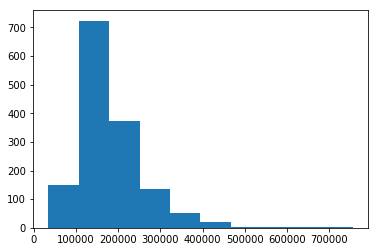

In [4]:
plt.hist(data_train.SalePrice)
plt.show()

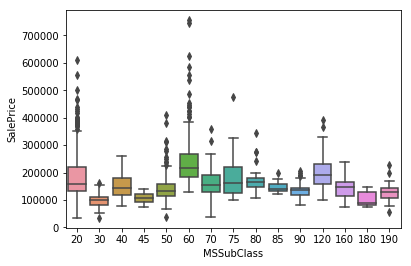

In [5]:
sns.boxplot(x='MSSubClass', y='SalePrice', data=data_train)

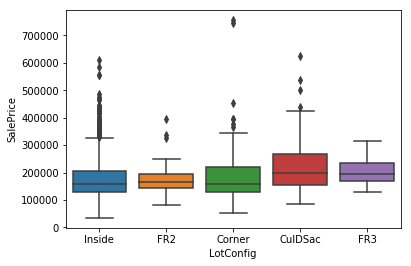

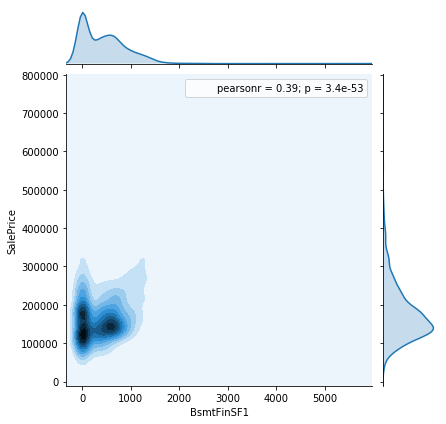

In [6]:
sns.boxplot(x='LotConfig', y='SalePrice', data=data_train)
sns.jointplot(x='BsmtFinSF1', y='SalePrice', data=data_train,kind='kde')

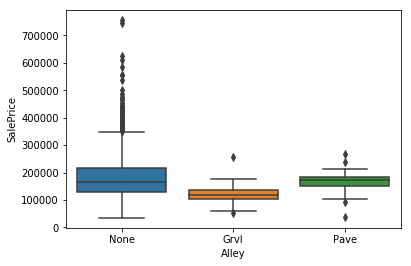

In [12]:
sns.boxplot(x='Alley', y='SalePrice', data=data_train)

In [ ]:
print('train dataset\n----------------')
tmp = data_train.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

print('\n\ntest dataset\n----------------')
tmp = data_test.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

In [ ]:
#Save the 'Id' column
train_ID = data_train['Id']
test_ID = data_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)

 방금 전 확인하였던 train data와 test data가 서로 빈 데이터를 가진 columns 자체가 다르다. 이로써 발생해주는 문제는 추후에 one-show-encoding을 통해 categorical data를 dummy data로 만들었을때 서로 다른 columns을 가진 두개의 dataframe이 생긴다는 것이다. 따라서 이를 해결하기 위하여 먼저 처리해줄 내용은 아래와 같다.
 
 - train data 에서 label 값인 SalePrice를 미리 저장
 - train data와 test data를 merge
 - merge한 데이터에서 label인 SalePrice 제거
 - merge한 데이터에서 빈 데이터값을 확인하고 채워준 후에 다시 train data와 test data로 나누기

In [ ]:
num_train = data_train.shape[0]
y_train = data_train.SalePrice

# 데이터를 합치고 index 재설정
data_all = pd.concat((data_train, data_test)).reset_index(drop=True)
display(data_all)

In [ ]:
tmp = data_all.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

 null값이 들어가있는 데이터를 확인하여 분석한 내용은 아래와 같다. -> 다음에 있는 값은 대체해줄 데이터이다.
 - Alley : 골목 접근 유형(Category) -> 'None'
 - Bsmt___ : (Category) -> 'None'
 - BsmtFinSF1 : FinType 1의 평방미터, Type1이 None인 경우 0.0으로 초기화되어있음 -> BsmtFinType1 isnull 확인 후 null이면 mean
 - BsmtFinSF2 : FinType 2의 평방미터, Type2이 None인 경우 0.0으로 초기화되어있음 -> BsmtFinType2 isnull 확인 후 null이면 mean
 - BsmtFullBath : fullbath 개수 -> 0.0
 - BsmtHalfBath : halfbath 개수 -> 0.0
 - BsmtUnfSF : Unfinished basement의 평방미터, 1개밖에 없으니 해당 index 삭제
 - Electrical : categorical data, None의 해당하는 data 없음, index 삭제
 - Exterior1st : categorical data, None의 해당하는 data 없음, index 삭제
 - Exterior2nd : categorical data, None의 해당하는 data 없음, index 삭제
 - Fence : 펜스 품질(Category) -> 'None'
 - FireplaceQu : 벽난로 품질(Category) -> 'None'
 - Functional :  categorical data, None의 해당하는 data 없음, index 삭제
 - GarageArea : 차고 넓이 (float) -> '0.0'
 - GarageCars : 차고에 차가 얼마나 들어가는지(Int) -> '0'
 - GarageCond : 차고 컨디션 -> 'None'
 - GarageFinish : 차고 내부공사 마무리 여부(Category) -> 'None'
 - GarageQual : 차고 품질(Category) -> 'None'
 - GarageType : 차고 타입(Category) -> 'None'
 - GarageYrBit : 차고 완공 년도(Int(year)) -> mean
 - KitchenQual : categorical data, None의 해당하는 data 없음, index 삭제
 - LotFrontage : 길과의 거리(float) -> mean
 - MSZoning : categorical data, None의 해당하는 data 없음, index 삭제
 - MasVnrType : 벽돌유형(Category) -> 'None'
 - MasVnrArea : 벽돌면적(float) -> mean
 - MiscFeature : 기타 특징(Category) -> 'None'
 - PoolQC : 풀 품질(Category) -> 'None'
 - SaleType : index 삭제
 - TotalBsmtSF : index 삭제
 - Utilities : index 삭제
 
 
 

In [ ]:
# BsmtFinSF1 : BsmtFinType1 isnull 확인 후 null이면 mean
data_all.BsmtFinSF1 = data_all.BsmtFinType1.fillna(data_all.BsmtFinSF1.mean())

# BsmtFinSF2 : BsmtFinType2 isnull 확인 후 null이면 mean
data_all.BsmtFinSF2 = data_all.BsmtFinType2.fillna(data_all.BsmtFinSF2.mean())

# BsmtFullBath : fullbath 개수 -> 0.0
data_all.BsmtFullBath = data_all.BsmtFullBath.fillna(0.0)

# BsmtHalfBath : halfbath 개수 -> 0.0
data_all.BsmtHalfBath = data_all.BsmtHalfBath.fillna(0.0)

# GarageArea : 차고 넓이 (float) -> '0.0'
data_all.GarageArea = data_all.GarageArea.fillna(0.0)

# GarageCars : 차고에 차가 얼마나 들어가는지(Int) -> '0'
data_all.GarageCars = data_all.GarageCars.fillna(0.0)

# GarageYrBit : 차고 완공 년도(Int(year)) -> mean
data_all.GarageYrBlt = data_all.GarageYrBlt.fillna(int(data_all.GarageYrBlt.mean()))


# LotFrontage : 길과의 거리(float) -> mean
data_all.LotFrontage = data_all.LotFrontage.fillna(data_all.LotFrontage.mean())

# MasVnrArea : 벽돌면적(float) -> mean
data_all.MasVnrArea = data_all.MasVnrArea.fillna(data_all.MasVnrArea.mean())

# BsmtUnfSF : Unfinished basement의 평방미터 -> mean
data_all.BsmtUnfSF = data_all.BsmtUnfSF.fillna(data_all.BsmtUnfSF.mean())

# Electrical : categorical data, None의 해당하는 data 없음
# Exterior1st : categorical data, None의 해당하는 data 없음
# Exterior2nd : categorical data, None의 해당하는 data 없음
# Functional : categorical data, None의 해당하는 data 없음
# KitchenQual : categorical data, None의 해당하는 data 없음
# MSZoning : categorical data, None의 해당하는 data 없음
# SaleType : Oth(other) 로 변경
data_all.SaleType = data_all.SaleType.fillna("Oth")

# TotalBsmtSF : 평방미터 -> mean
data_all.TotalBsmtSF = data_all.TotalBsmtSF.fillna(data_all.TotalBsmtSF.mean())

# fill nan to 'None'
data_all = data_all.fillna('None')

In [ ]:
tmp = data_all.isnull().sum()

# nan값이 들어가있는 data가 있는지 확인하는 과정
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

display(data_all.shape)

# #reindex
# data_all = data_all.reset_index(drop=True)

In [ ]:
data_all.MSSubClass = data_all.MSSubClass.apply(str)
display(data_all.MSSubClass)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#         'YrSold', 'MoSold')
# # process columns, apply LabelEncoder to categorical features
# for c in cols:
#     lbl = LabelEncoder() 
#     lbl.fit(list(data_all[c].values)) 
#     data_all[c] = lbl.transform(list(data_all[c].values))

# # shape        
# print('Shape all_data: {}'.format(data_all.shape))

In [ ]:
data_all.head()

In [ ]:

# from scipy.stats import norm, skew #for some statistics

# pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# numeric_feats = data_all.dtypes[data_all.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_feats = data_all[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [ ]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     data_all[feat] = boxcox1p(data_all[feat], lam)
    
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])





In [ ]:
display(data_all.head())

In [ ]:
# one-hot-encoding 전 saleprice 추출 후 저장
saleprice = data_all.SalePrice
data_all.drop("SalePrice", axis = 1, inplace = True)

In [ ]:
saleprice

In [ ]:
data_all = pd.get_dummies(data_all)

data_all['SalePrice'] = saleprice

display(data_all[data_all.SalePrice == "None"])

In [ ]:
data_train = data_all.loc[:1459]
data_test = data_all.loc[1460:]

display(data_train.head())
display(data_train.tail())
display(data_test.head())
display(data_test.tail())

y_train = data_train.SalePrice


In [ ]:
data_train.SalePrice = data_train.SalePrice.apply(float)

# Train data(dummy)로 corrmat 생성
corrmat = data_train.corr()

# 생성된 corrmat 중 SalePrice와의 연관이 0.5 이상인 columns 추출
corr_up = np.where(abs(corrmat['SalePrice'])>0.5)
predict_cols = corrmat['SalePrice'][list(corr_up[0])].keys()

display(corrmat['SalePrice'][predict_cols])
display(corrmat['SalePrice'][predict_cols].shape)

In [ ]:
data_train.drop("SalePrice", axis = 1, inplace = True)
data_test.drop("SalePrice", axis = 1, inplace = True)

In [ ]:
predict_cols = list(predict_cols)
predict_cols.remove('SalePrice')

In [ ]:
from sklearn.ensemble import RandomForestRegressor


my_model = RandomForestRegressor()
my_model.fit(data_train[predict_cols], y_train)

In [ ]:
predicted_prices = my_model.predict(data_test[predict_cols])

In [ ]:
print(predicted_prices)

In [ ]:
my_submission = pd.DataFrame({'Id': data_test.index+1, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_merge_select_P0_5.csv', index=False)

In [ ]:

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error, False)


clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=clf, X=data_train, y=y_train, cv=15, scoring = scorer))

# Fit model with training data
clf.fit(data_train, y_train)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(clf.feature_importances_, index = data_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()



In [ ]:
display(coef.index[0:15])

In [ ]:
display(data_train)

In [ ]:
from sklearn.cross_validation import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_train, y_train)
clf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
for i in coef.index:
    print(i, end='   ')

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_train[coef.index], y_train)
clf = RandomForestRegressor(n_estimators=1000, n_jobs=-100, max_features=50)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(y_test1,y_pred))

In [ ]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_train[coef.index[0:10]], y_train)
clf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [ ]:
clf.fit(data_train[coef.index[0:200]], y_train)

In [ ]:
y_pred = clf.predict(data_test[coef.index[0:200]])

In [ ]:
my_submission = pd.DataFrame({'Id': data_test.index+1, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('randomforest_top200', index=False)